Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'CRO'
against_currency = 'USD'

start = dt.datetime(2019,1,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-01,0.021571,0.019954,0.020354,0.021466,2003417.0,0.021466
2019-01-02,0.021672,0.020869,0.021527,0.021441,1988273.0,0.021441
2019-01-03,0.021828,0.021073,0.021448,0.021424,2409212.0,0.021424
2019-01-04,0.021674,0.021193,0.021359,0.021559,2407523.0,0.021559
2019-01-05,0.021721,0.018613,0.021495,0.018613,1821065.0,0.018613
...,...,...,...,...,...,...
2021-06-12,0.122423,0.110949,0.112479,0.120157,51021797.0,0.120157
2021-06-13,0.123977,0.116405,0.120151,0.122173,50043681.0,0.122173
2021-06-14,0.120262,0.115532,0.119653,0.119614,47233670.0,0.119614


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 723 entries, 2019-01-01 to 2021-06-18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       723 non-null    float64
 1   Low        723 non-null    float64
 2   Open       723 non-null    float64
 3   Close      723 non-null    float64
 4   Volume     723 non-null    float64
 5   Adj Close  723 non-null    float64
 6   Spread     723 non-null    float64
dtypes: float64(7)
memory usage: 45.2 KB


## Plot the closing value of Crypto.com Coin over time

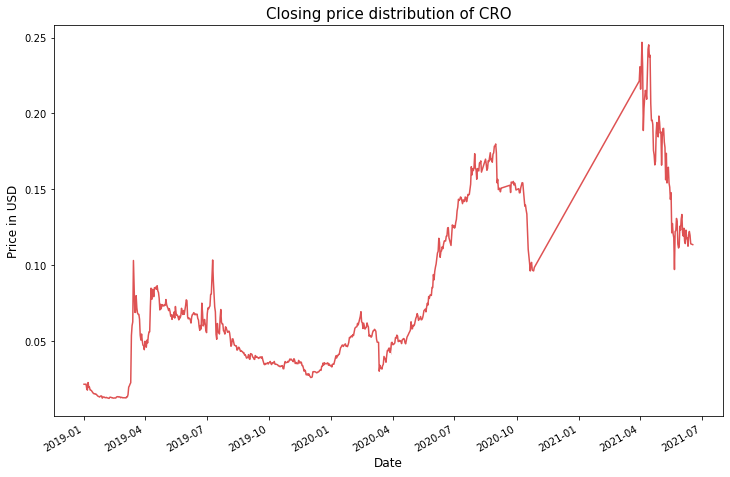

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of CRO", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-01,0.021571,0.019954,0.020354,0.021466,2003417.0,0.021466
2019-01-02,0.021672,0.020869,0.021527,0.021441,1988273.0,0.021441
2019-01-03,0.021828,0.021073,0.021448,0.021424,2409212.0,0.021424
2019-01-04,0.021674,0.021193,0.021359,0.021559,2407523.0,0.021559
2019-01-05,0.021721,0.018613,0.021495,0.018613,1821065.0,0.018613
...,...,...,...,...,...,...
2021-06-12,0.122423,0.110949,0.112479,0.120157,51021797.0,0.120157
2021-06-13,0.123977,0.116405,0.120151,0.122173,50043681.0,0.122173
2021-06-14,0.120262,0.115532,0.119653,0.119614,47233670.0,0.119614


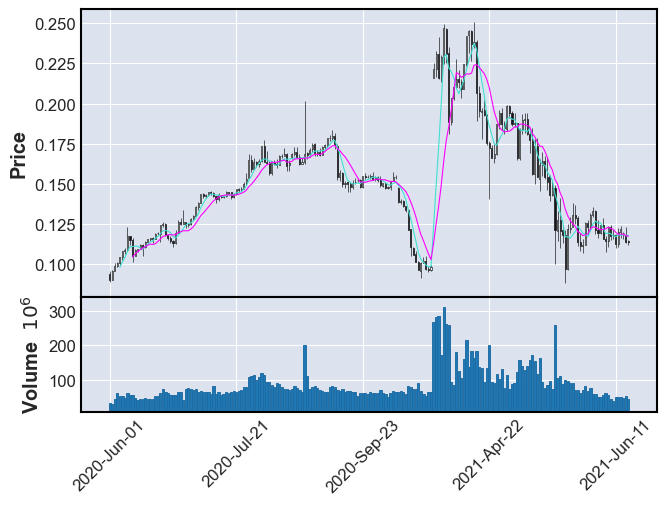

In [6]:
mpf.plot(temp_base_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
base_df

,High,Low,Open,Close,Volume,Adj Close,Spread
Date,,,,,,,
2019-01-01,0.021571,0.019954,0.020354,0.021466,2003417.0,0.021466,0.001617
2019-01-02,0.021672,0.020869,0.021527,0.021441,1988273.0,0.021441,0.000803
2019-01-03,0.021828,0.021073,0.021448,0.021424,2409212.0,0.021424,0.000755
2019-01-04,0.021674,0.021193,0.021359,0.021559,2407523.0,0.021559,0.000481
2019-01-05,0.021721,0.018613,0.021495,0.018613,1821065.0,0.018613,0.003108
...,...,...,...,...,...,...,...
2021-06-12,0.122423,0.110949,0.112479,0.120157,51021797.0,0.120157,0.011474
2021-06-13,0.123977,0.116405,0.120151,0.122173,50043681.0,0.122173,0.007572
2021-06-14,0.120262,0.115532,0.119653,0.119614,47233670.0,0.119614,0.004730


In [9]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-1-1']
price_predict_df

,ds,y
366,2020-01-02,0.032858
367,2020-01-03,0.034666
368,2020-01-04,0.034689
369,2020-01-05,0.034618
370,2020-01-06,0.036529
...,...,...
718,2021-06-12,0.120157
719,2021-06-13,0.122173
720,2021-06-14,0.119614
721,2021-06-15,0.114061


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
358,2021-06-21,0.089448,0.078099,0.100787
359,2021-06-22,0.087492,0.076478,0.098934
360,2021-06-23,0.085447,0.073713,0.096311
361,2021-06-24,0.083893,0.073520,0.095288
362,2021-06-25,0.082784,0.071360,0.094293


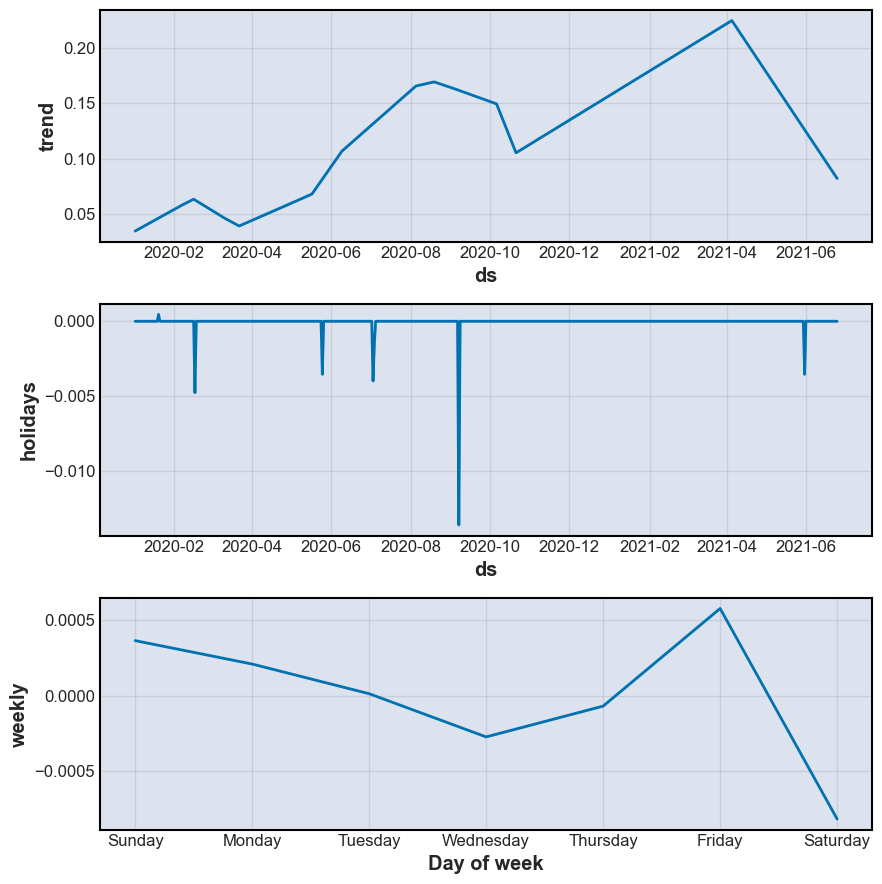

In [14]:
m = Prophet(changepoint_prior_scale=1)
m.add_country_holidays(country_name='US')
m.fit(price_predict_df);
m.train_holiday_names

forecast = m.predict(future)
fig = m.plot_components(forecast)


future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

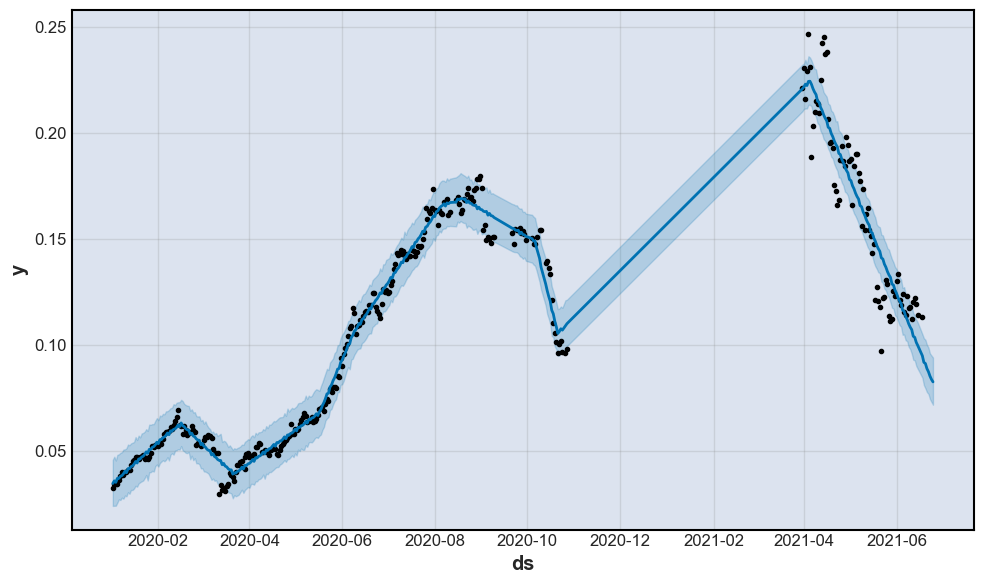

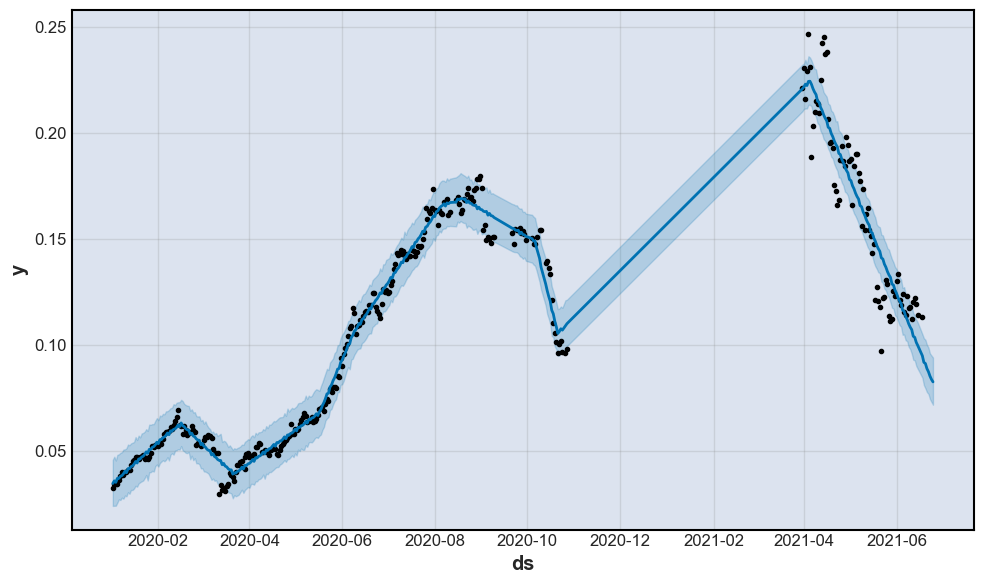

In [11]:
m.plot(forecast)

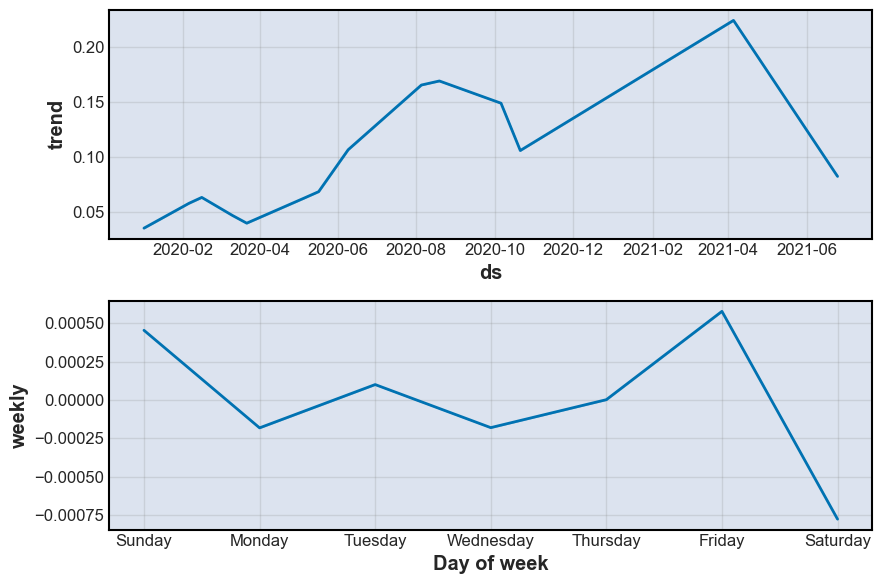

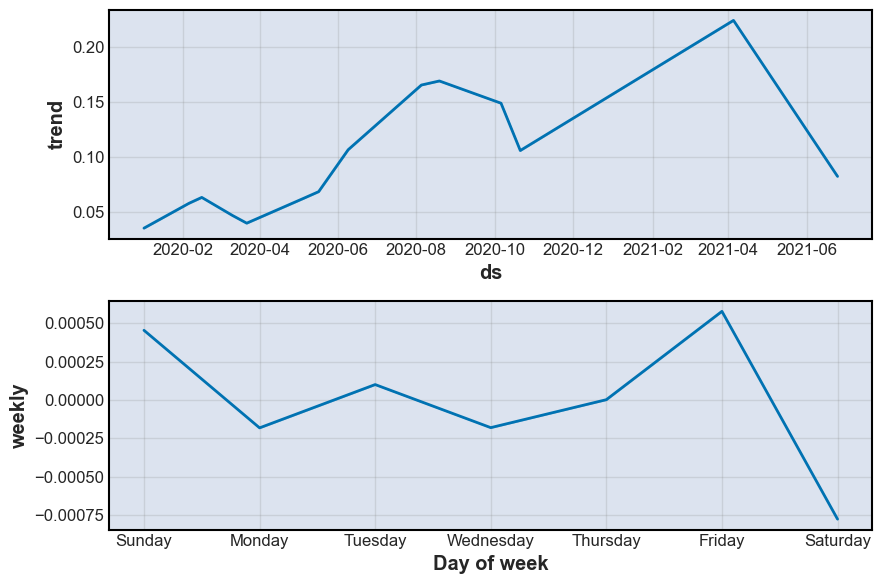

In [12]:
m.plot_components(forecast)